<a href="https://colab.research.google.com/github/vinicunhac/fiap_big_data_science/blob/main/predict_baba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Libs

In [302]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from google.colab import files
import datetime
import seaborn as sns
from google.colab import drive
import os
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Loading datasets

In [284]:
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/SHIFT/desafio/baba/BABA.csv", )
df.head(5)

,Unnamed: 0,X,date,mes,weekday,margem,venda,desconto,outdesc,outmg
0,1,1,20140801,agosto,sexta-feira,0.406111,110042.460,9190.907534,0,0
1,2,2,20140802,agosto,sabado,0.416022,58377.320,5713.043012,0,0
2,3,3,20140803,agosto,domingo,0.431993,64635.390,8621.708915,0,0
3,4,4,20140804,agosto,segunda-feira,0.409216,140417.321,18312.965640,0,0
4,5,5,20140805,agosto,terca-feira,0.449648,149700.286,19942.741300,0,0


In [285]:
df_pib = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Pasta.xlsx')
df_pib['truncated'] = df_pib['data'].dt.strftime("%Y-%m")
df_pib = df_pib[['truncated', 'Indice PIB']]
df_pib.head()

,truncated,Indice PIB
0,2003-01,100.000000
1,2003-02,100.933407
2,2003-03,101.275227
3,2003-04,100.685073
4,2003-05,101.161266


## 2. Features Engineering

In [286]:
df.dtypes

Unnamed: 0      int64
X               int64
date            int64
mes            object
weekday        object
margem        float64
venda         float64
desconto      float64
outdesc         int64
outmg           int64
dtype: object

In [287]:
df.isnull().sum()

Unnamed: 0     0
X              0
date           0
mes            0
weekday        0
margem         0
venda         31
desconto       0
outdesc        0
outmg          0
dtype: int64

In [288]:
df['date'] = df['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df.drop(['Unnamed: 0', 'X'],axis=1,inplace=True)

In [289]:
df['truncated'] = df['date'].dt.strftime("%Y-%m")

In [290]:
df = pd.merge(df, df_pib,  how='inner', left_on=['truncated'], right_on = ['truncated'])

In [291]:
df.head()

,date,mes,weekday,margem,venda,desconto,outdesc,outmg,truncated,Indice PIB
0,2014-08-01,agosto,sexta-feira,0.406111,110042.460,9190.907534,0,0,2014-08,153.165471
1,2014-08-02,agosto,sabado,0.416022,58377.320,5713.043012,0,0,2014-08,153.165471
2,2014-08-03,agosto,domingo,0.431993,64635.390,8621.708915,0,0,2014-08,153.165471
3,2014-08-04,agosto,segunda-feira,0.409216,140417.321,18312.965640,0,0,2014-08,153.165471
4,2014-08-05,agosto,terca-feira,0.449648,149700.286,19942.741300,0,0,2014-08,153.165471


In [266]:
dummy_weekday = pd.get_dummies(df['weekday'])
df = pd.concat([df, dummy_weekday], axis = 1)

dummy_month = pd.get_dummies(df['mes'])
df = pd.concat([df, dummy_month], axis = 1)

In [267]:
treino = df.iloc[0:365,]
teste = df.iloc[366:396,]


In [268]:
df.shape

(396, 29)

In [269]:
df.dtypes

date             datetime64[ns]
mes                      object
weekday                  object
margem                  float64
venda                   float64
desconto                float64
outdesc                   int64
outmg                     int64
truncated                object
Indice PIB              float64
domingo                   uint8
quarta-feira              uint8
quinta-feira              uint8
sabado                    uint8
segunda-feira             uint8
sexta-feira               uint8
terca-feira               uint8
abril                     uint8
agosto                    uint8
dezembro                  uint8
fevereiro                 uint8
janeiro                   uint8
julho                     uint8
junho                     uint8
maio                      uint8
marco                     uint8
novembro                  uint8
outubro                   uint8
setembro                  uint8
dtype: object

## 3. Data Exploring

<AxesSubplot:xlabel='date'>

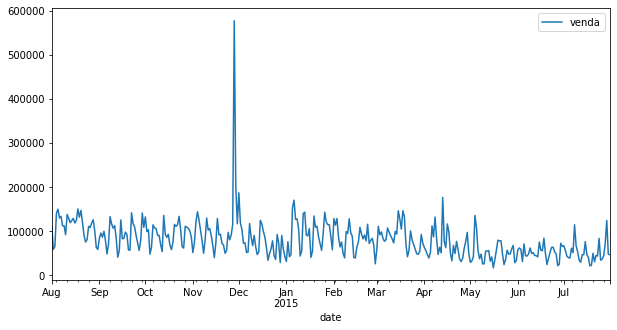

In [270]:
treino.groupby('date').agg('sum')[['venda']].plot(kind='line',
                                                  figsize=(10, 5),
                                                  stacked=True)

<AxesSubplot:xlabel='date'>

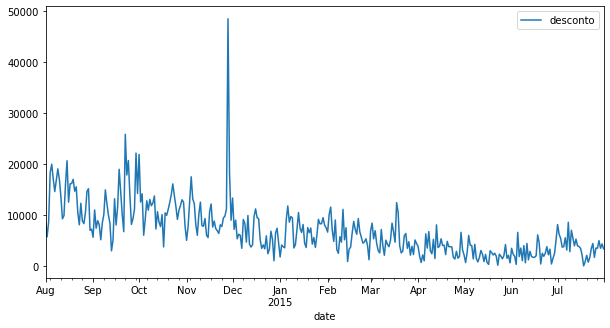

In [271]:
treino.groupby('date').agg('sum')[['desconto']].plot(kind='line',
                                                  figsize=(10, 5),
                                                  stacked=True)

<AxesSubplot:xlabel='date'>

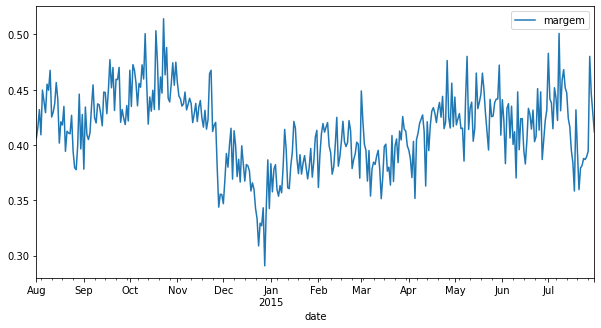

In [272]:
treino.groupby('date').agg('mean')[['margem']].plot(kind='line',
                                                  figsize=(10, 5),
                                                  stacked=True)

<AxesSubplot:xlabel='weekday'>

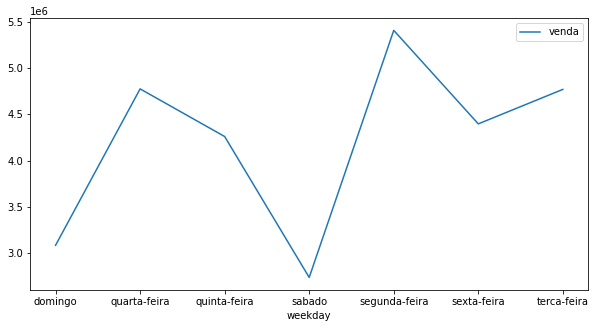

In [273]:
treino.groupby('weekday').agg('sum')[['venda']].plot(kind='line',
                                                    figsize=(10, 5),
                                                    stacked=True)

<AxesSubplot:xlabel='weekday'>

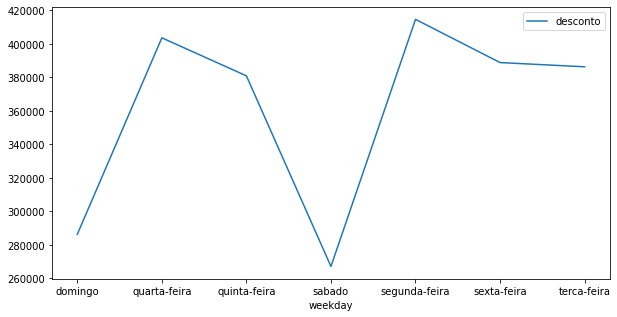

In [274]:
treino.groupby('weekday').agg('sum')[['desconto']].plot(kind='line',
                                                    figsize=(10, 5),
                                                    stacked=True)

<AxesSubplot:xlabel='venda', ylabel='desconto'>

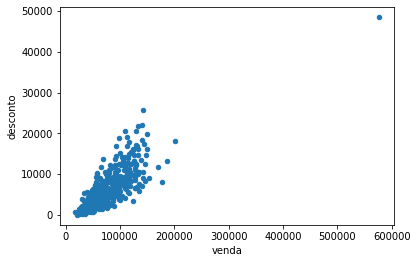

In [276]:
treino.plot.scatter(x='venda', y='desconto')

<AxesSubplot:xlabel='venda', ylabel='margem'>

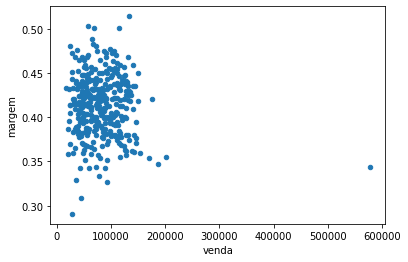

In [310]:
treino.plot.scatter(x='venda', y='margem')

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 0 to 395
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           396 non-null    datetime64[ns]
 1   mes            396 non-null    object        
 2   weekday        396 non-null    object        
 3   margem         396 non-null    float64       
 4   venda          365 non-null    float64       
 5   desconto       396 non-null    float64       
 6   outdesc        396 non-null    int64         
 7   outmg          396 non-null    int64         
 8   truncated      396 non-null    object        
 9   Indice PIB     396 non-null    float64       
 10  domingo        396 non-null    uint8         
 11  quarta-feira   396 non-null    uint8         
 12  quinta-feira   396 non-null    uint8         
 13  sabado         396 non-null    uint8         
 14  segunda-feira  396 non-null    uint8         
 15  sexta-feira    396 non-

## 4. Bulding Model

In [311]:
# features = ['agosto', 'dezembro','sabado', 'desconto', 'margem'] Score: 14822.83886
# features = ['agosto',  'sabado', 'desconto', 'margem'] Score: 15778.4137 
# features = ['agosto', 'novembro', 'sabado', 'segunda-feira', 'quarta-feira', 'desconto', 'margem'] Score: 16128.5772 
# features = ['agosto', 'novembro', 'julho', 'sabado', 'segunda-feira', 'quarta-feira', 'desconto', 'margem'] Score: 16173.33583
# features = ['agosto',  'segunda-feira', 'desconto', 'margem'] Score: 16389.83476
# features = ['agosto',  'sabado', 'desconto', 'margem', 'outdesc', 'outmg'] Score: 20951.35944
features = ['agosto', 'dezembro','sabado', 'desconto', 'margem']
y_treino = treino['venda']
x_treino = treino[features]
x_teste = teste[features]

In [312]:
mod = LinearRegression()
mod.fit(x_treino, y_treino)
prev = mod.predict(x_teste)

In [313]:
pd.DataFrame(prev).to_csv('predict.csv')
files.download('predict.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>